# BIOS 512 Final Project: TidyTuesday Olympics Data Set

## This notebook will create 3 visualizations looking at athlete data from from the Summer olympics. Some categories that stood out were the age of athletes, the number of athletes per country at each olympics and  the medal count for each country for the 2016 olympics. 

In [1]:
library(tidyverse)
olympics = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-08-06/olympics.csv', col_types = cols())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


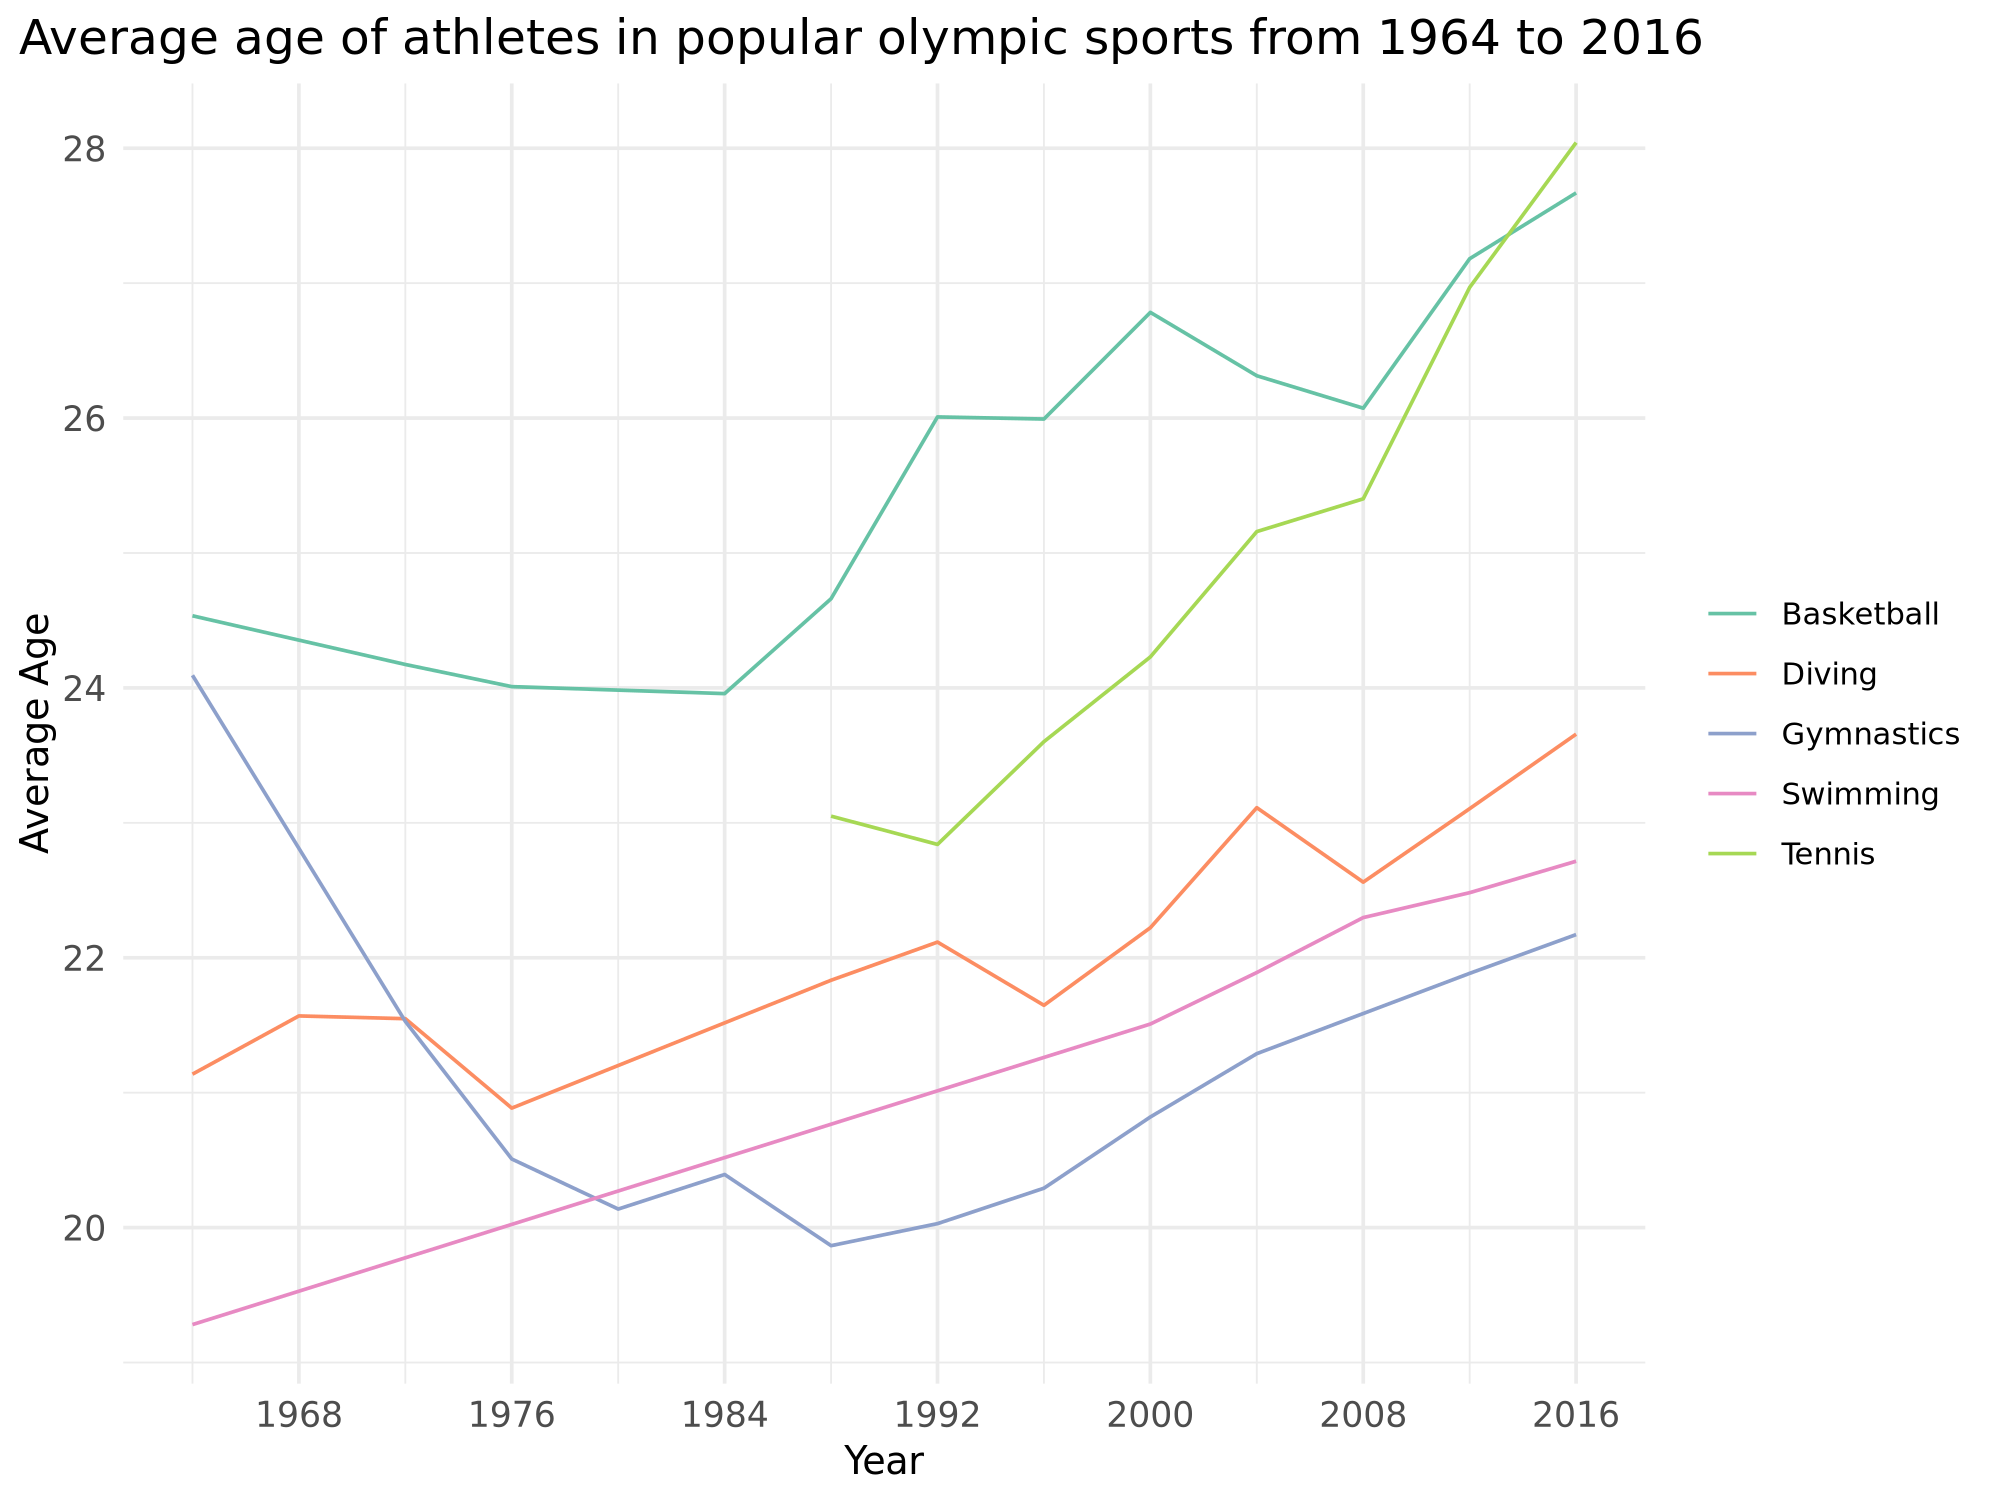

In [2]:
olympics2 = olympics |>
    filter(season == "Summer", sport %in% c("Tennis","Gymnastics", "Basketball", "Swimming", "Diving"), year >= 1964) |>
    group_by(year, sport) |>
    summarize(avg_age = mean(age), .groups = "drop")|>
    drop_na()

options(repr.plot.width = 8, repr.plot.height = 6)   
ggplot(olympics2, aes(x = year,y= avg_age, color = sport)) + 
    geom_line()+
    guides(color = guide_legend(title = NULL)) +
    theme_minimal()+
    theme(
    axis.text = element_text(size = 10),
        plot.title.position = "plot",
        plot.title = element_text(size = 14))+
    labs(
        x = 'Year',
        y = 'Average Age',
        title= 'Average age of athletes in popular olympic sports from 1964 to 2016',
        )+
        scale_color_brewer(palette ='Set2')+
    scale_x_continuous(breaks=seq(1960,2016,by=8))

    

This first visualization looks at how the age of athletes has changed over time in some of the most popular sports from the 1964 olympics forward. Some athletes ages were not available for some sports until a certain year in this data set. The popular sports selected were Tennis, Gymnastics, Basketball (Men's and Women's), Swimming and Diving. The data was filtered so only data from the summer olympic and these specific sports from 1964 was used. An average of the age of all athletes for a sport was taken and the changes over time can be seen below in a line graph.

The next two visualizations look specifically at the olympic games from Rio in 2016. The first looks at the number of athletes sent to the olympics by each National Olympic Committee. The second of the two shpows the medal count for each committee. Since there are so many cuntries that participate in the olympics only the top 25 countries were displayed and all other countries were grouped together. It is interesting to see which countries appear in both graphs or appear in one but not the other. THe United States dominates the top of both areas. It is also interesting to look at the placement of the host country in these two graphs.

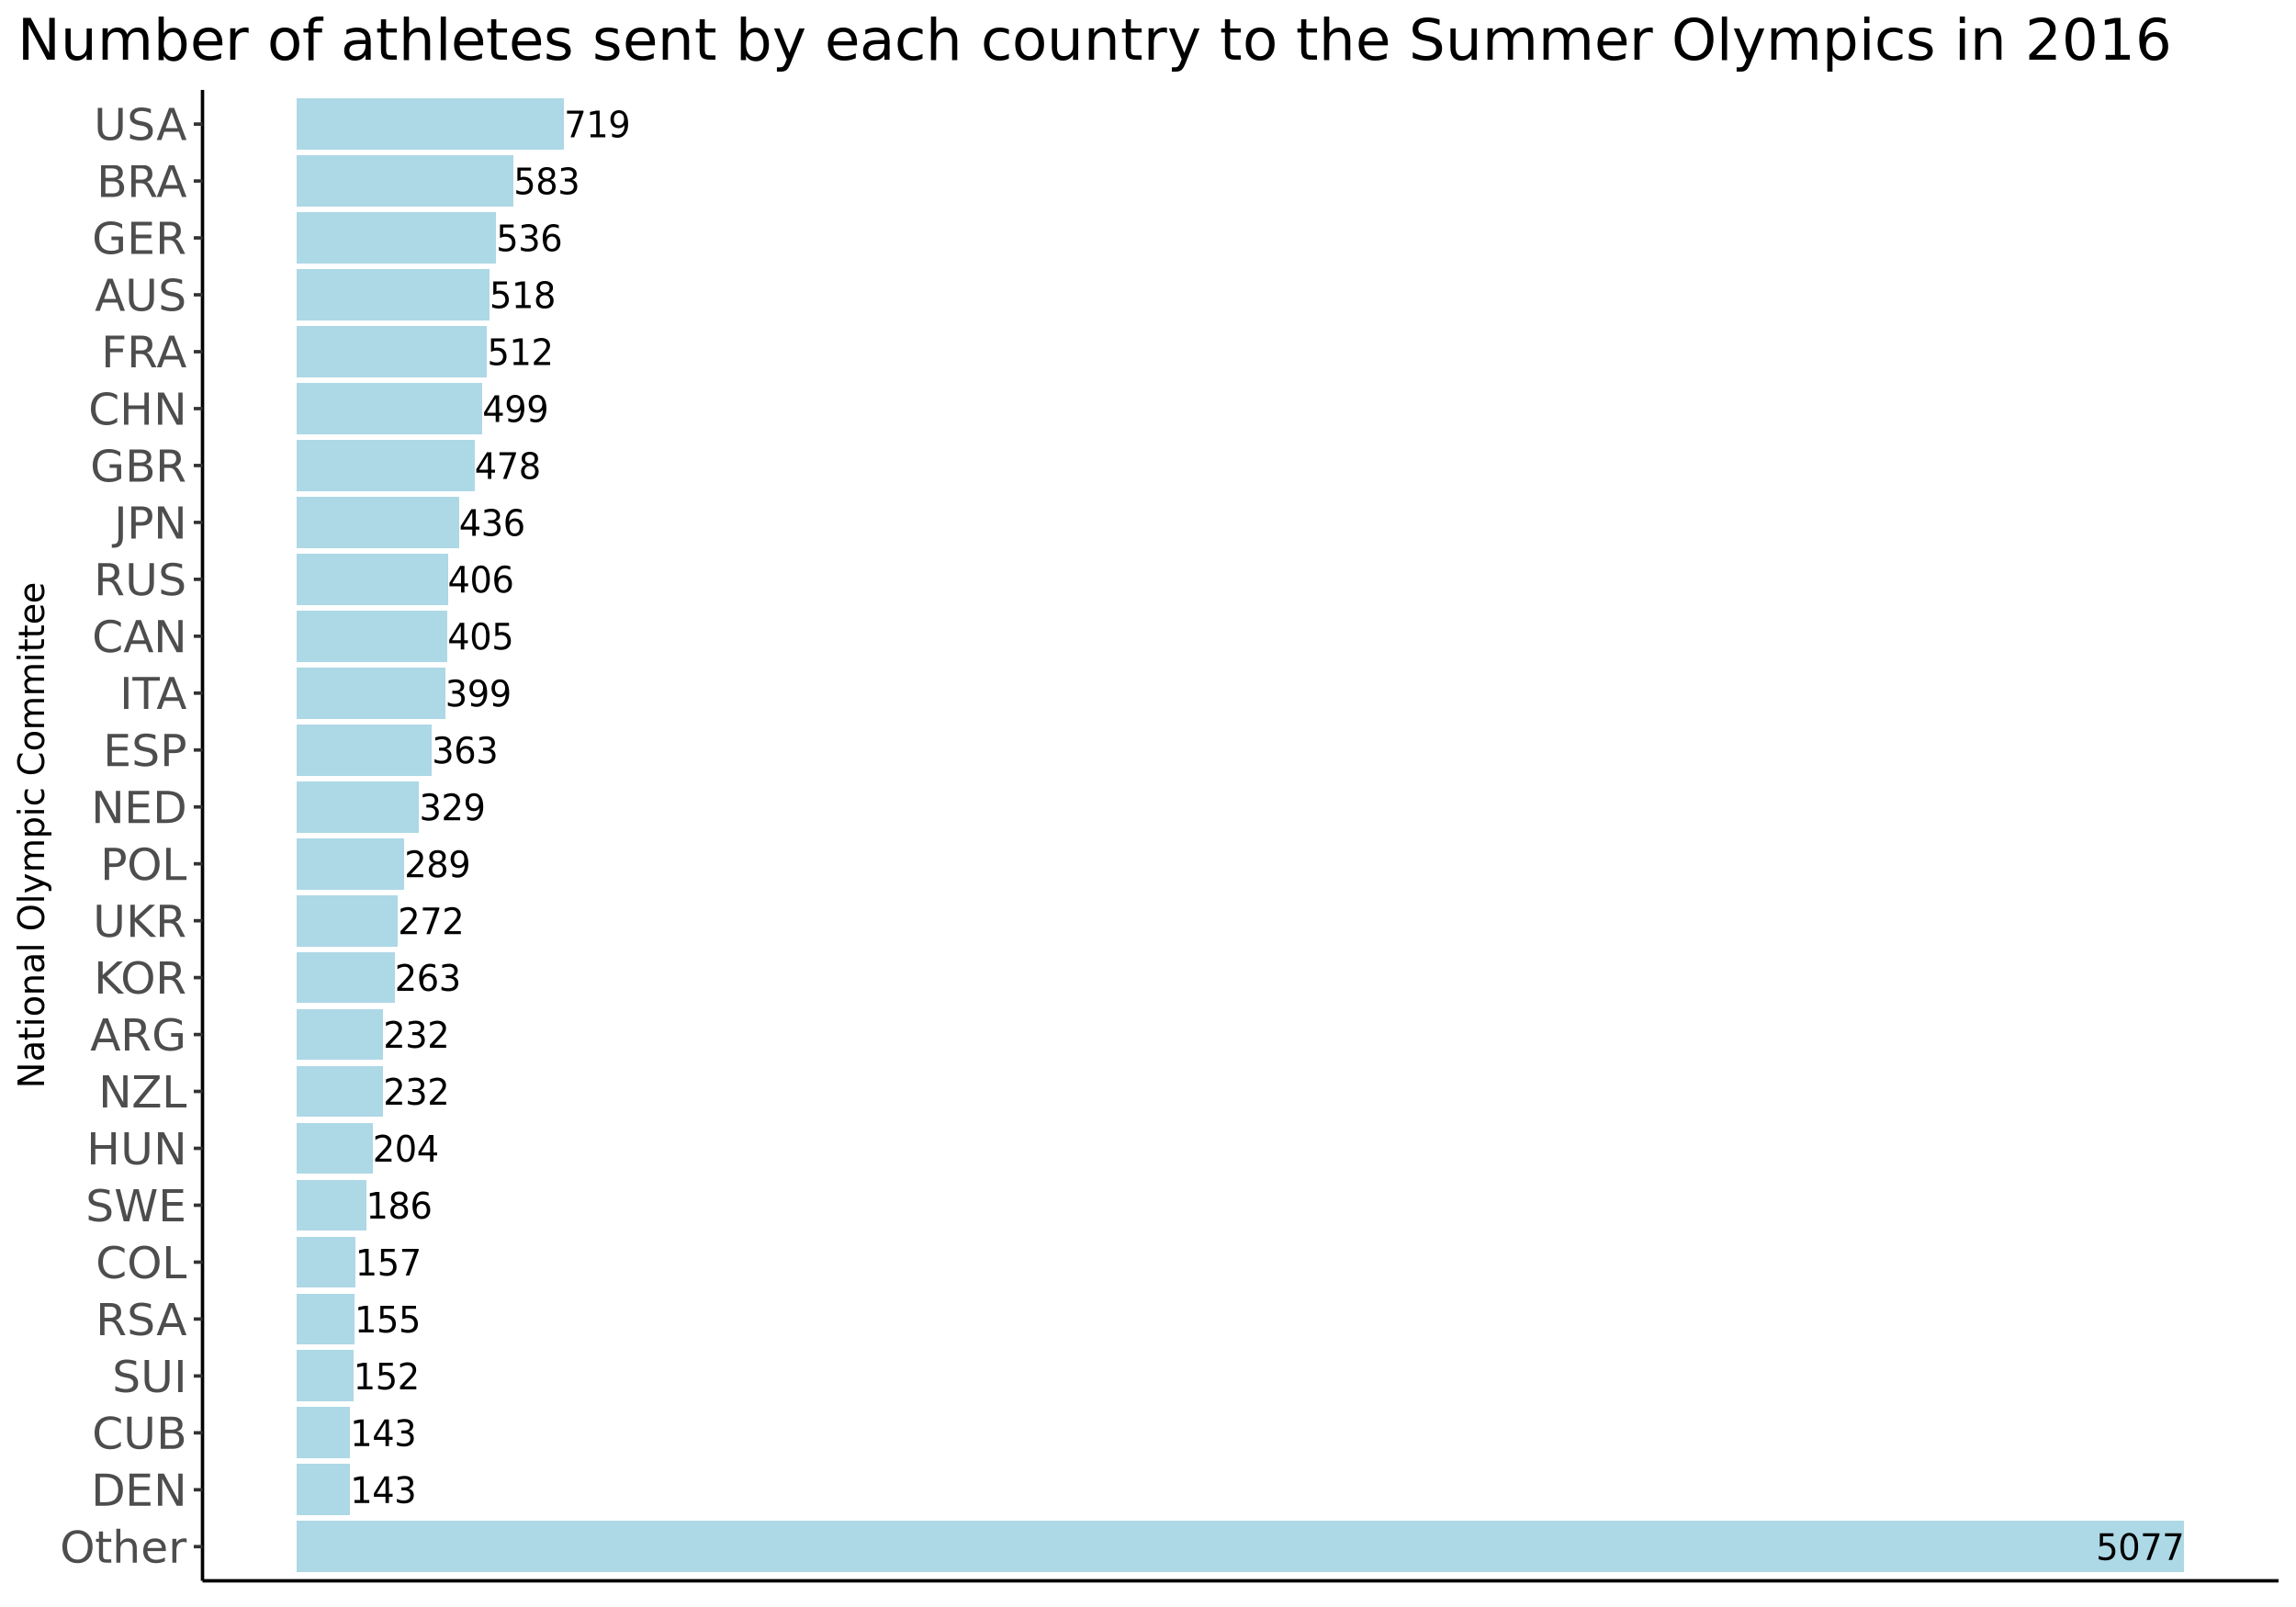

In [3]:
olympics3 = olympics |>
    filter(season == "Summer", year == 2016)|>
    mutate(noc = fct_infreq(noc) |>
           fct_lump(n=25) |> 
           fct_relevel('Other', after= Inf) |> fct_rev())


options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(olympics3, aes(y= noc)) + 
    geom_bar(fill = "lightblue")+
    geom_text(aes(label = after_stat(count)), stat = "count", hjust ="inward")+
    theme_classic()+
    guides(fill = 'none')+
    labs(
        y = 'National Olympic Committee',
        title= 'Number of athletes sent by each country to the Summer Olympics in 2016',
        )+
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text = element_text(size = 14),
        plot.title.position = "plot",
        plot.title = element_text(size = 18))

    

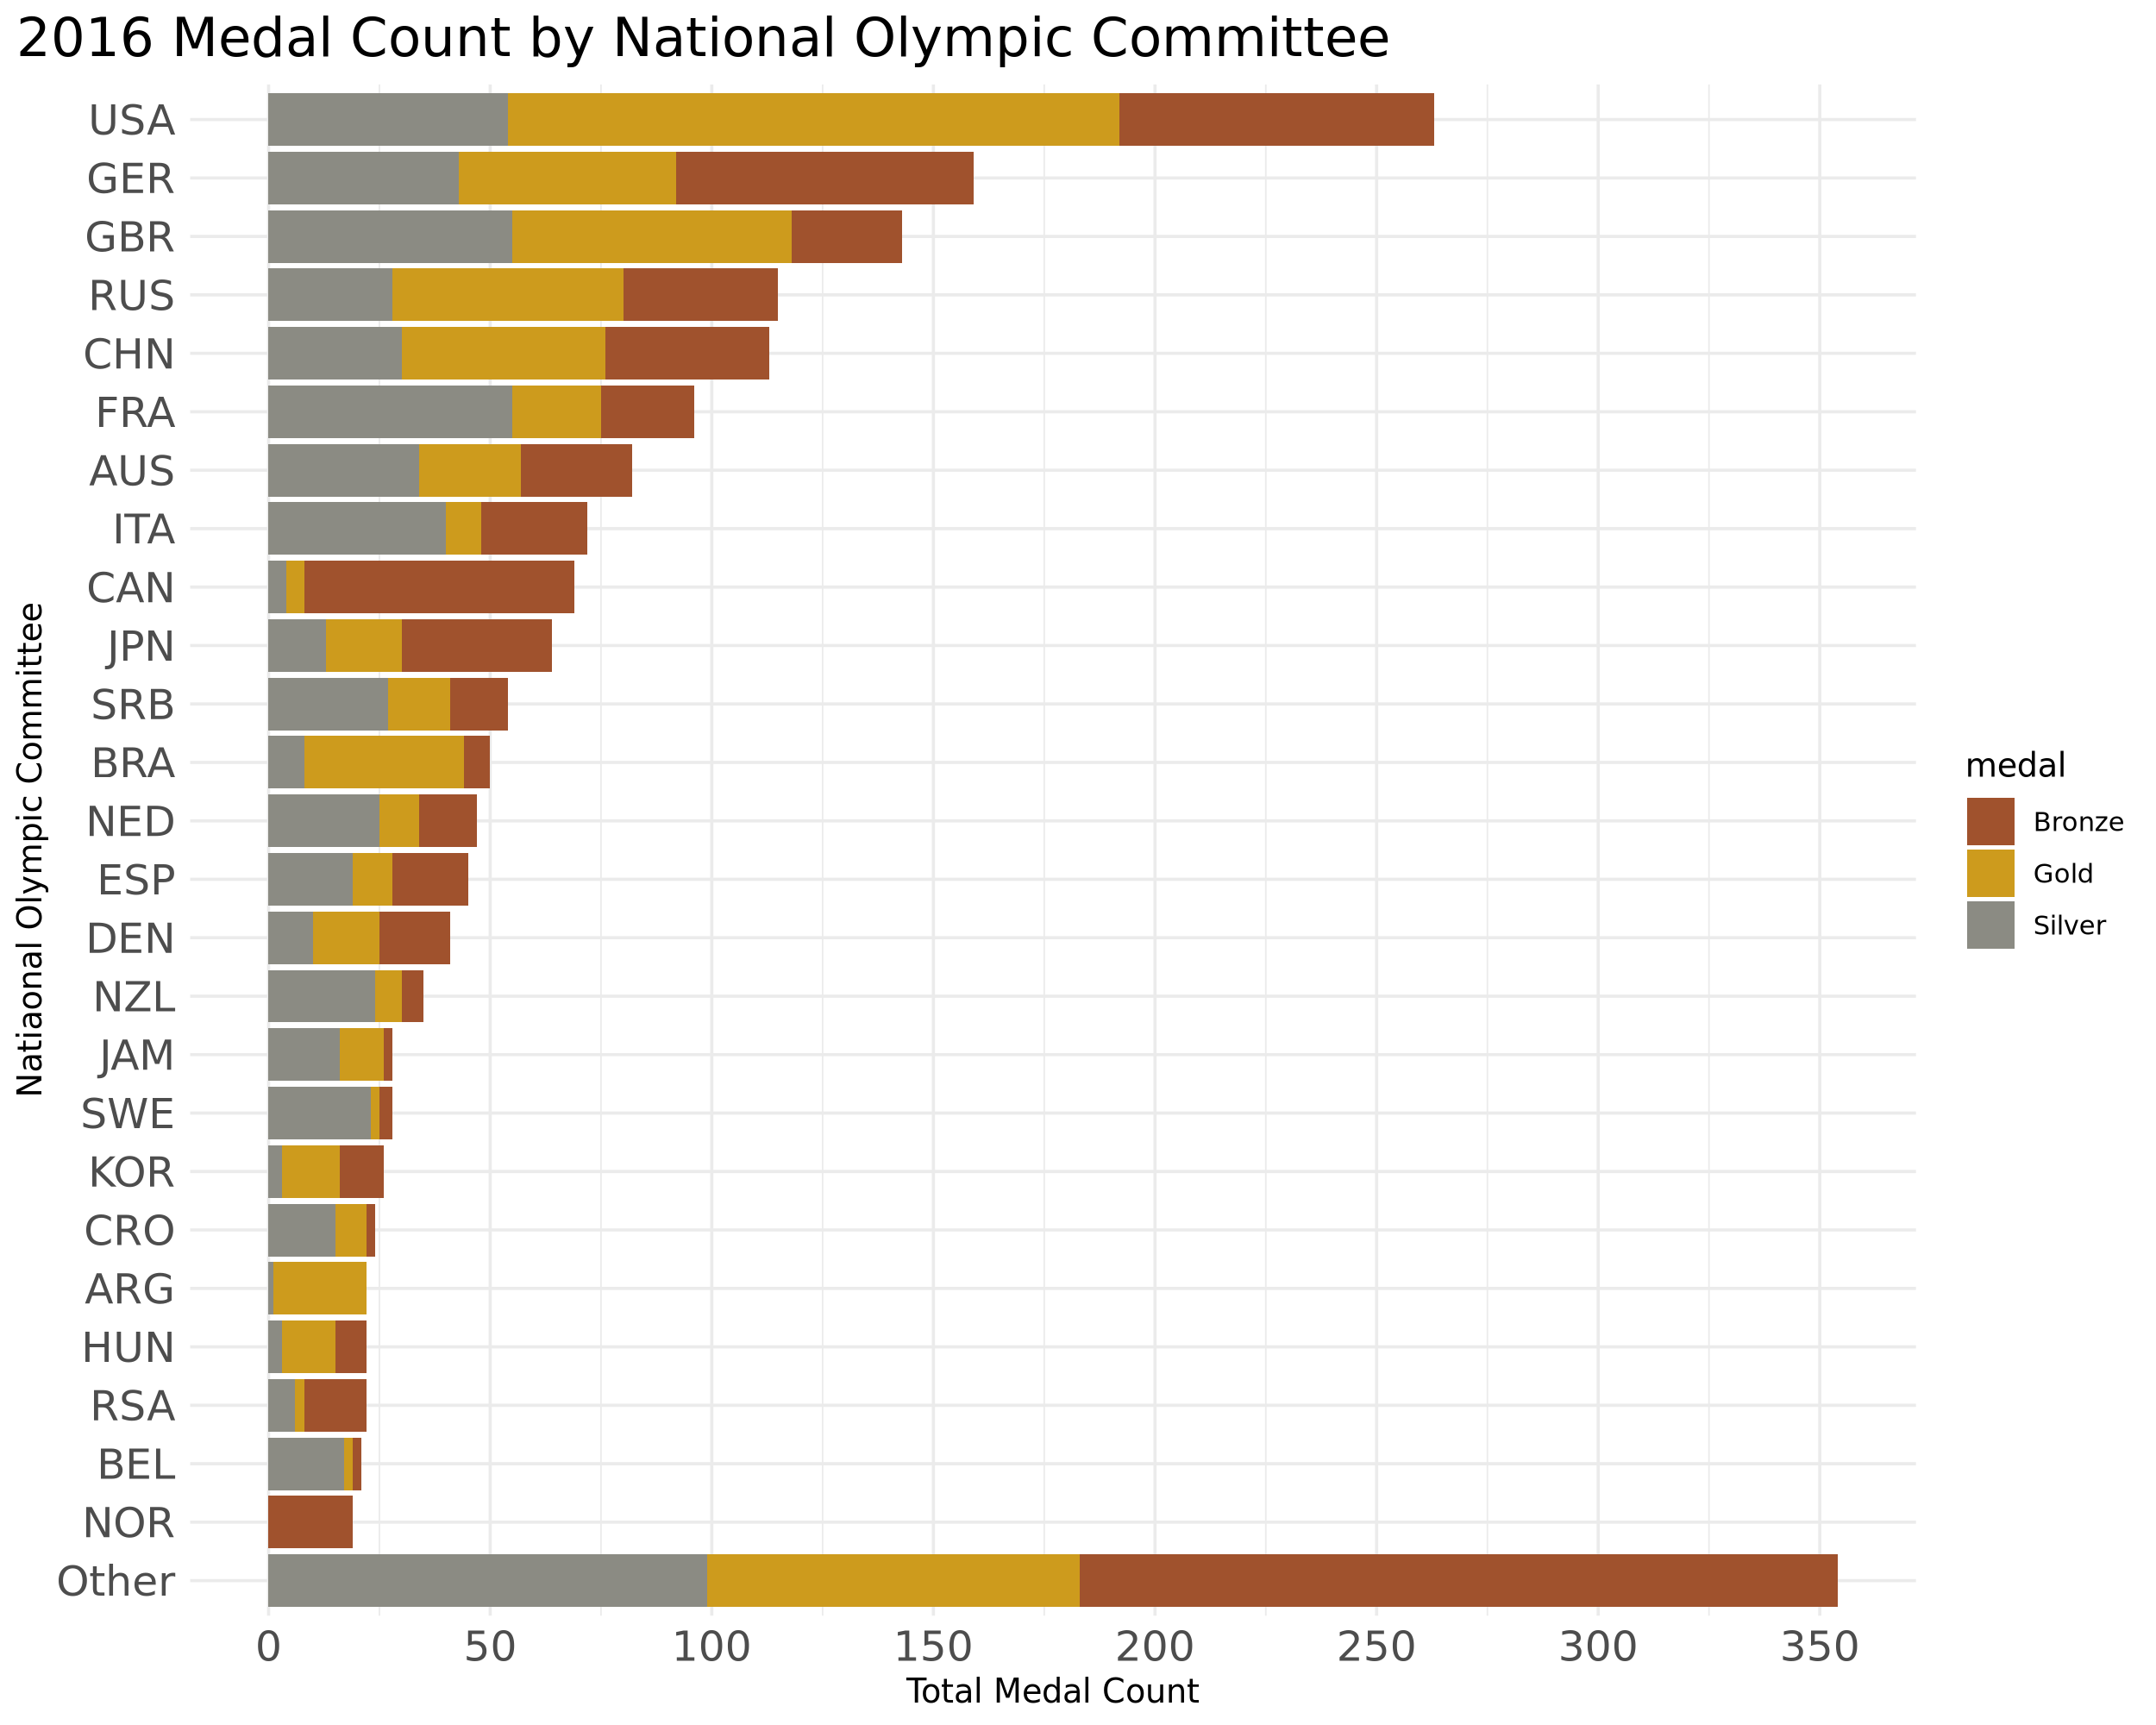

In [4]:
olympics4 = olympics |>
    drop_na() |>
    filter(year == 2016, season == "Summer") |>
    mutate(noc = fct_infreq(noc) |>
           fct_lump(n=25) |> 
           fct_relevel('Other', after= Inf) |> fct_rev())

colors = c('sienna','goldenrod3','ivory4')

options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(olympics4, aes(y= noc, fill = medal)) + geom_bar(position = 'stack') +
    theme_minimal()+
    labs(
        x = 'Total Medal Count',
        y = 'Natiaonal Olympic Committee',
        title= '2016 Medal Count by National Olympic Committee',
        )+
    scale_x_continuous(breaks=seq(0,400,by=50)) +
    scale_fill_manual(values = colors)+
    theme(
        axis.text = element_text(size = 14),
        plot.title.position = "plot",
        plot.title = element_text(size = 18))


